## Clustering 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df= pd.DataFrame(
     data={
         'x0':[7,5,7,3,4,1,0,2,8,6,5,3],
         'x1':[5,7,7,3,6,4,0,2,7,8,5,7]})
df

,x0,x1
0,7,5
1,5,7
2,7,7
3,3,3
4,4,6
5,1,4
6,0,0
7,2,2
8,8,7
9,6,8


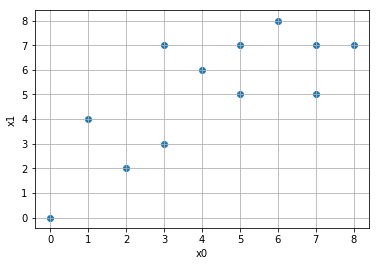

In [39]:
plt.scatter(df['x0'],df['x1'])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

- **Forming 2 Clusters**

In [40]:
from sklearn.cluster import KMeans


kmeans= KMeans(n_clusters=2, init='random') #3 clusters are formed
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)
c= kmeans.cluster_centers_ #centroid points
print('Centroids are\n',c)

[1 1 1 0 1 0 0 0 1 1 1 1]
Centroids are
 [[1.5   2.25 ]
 [5.625 6.5  ]]


In [41]:
print(kmeans.inertia_) #sum of squared distance to cluster

41.625


In [42]:
print('Clusters are formed in {0} iterations'.format (kmeans.n_iter_))

Clusters are formed in 4 iterations


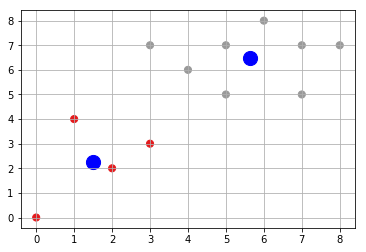

In [43]:
plt.scatter(df['x0'],df['x1'], c=y_kmeans, s=50, cmap='Set1')
plt.scatter(c[:,0],c[:,1], c='blue', s=200)
plt.grid()

## Distance between centroid and other cluster points

In [53]:
c1_centroid=c[0]
c2_centroid=c[1]

cluster1_points=df[y_kmeans==0]
cluster2_points=df[y_kmeans==1]

print(cluster1_points)
print(cluster2_points)

c1_distances=cluster1_points.apply(lambda x: np.sqrt ((x[0]-c1_centroid[0])**2 +
                                                      (x[1]-c1_centroid[1])**2),axis=1)
c2_distances=cluster2_points.apply(lambda x: np.sqrt ((x[0]-c2_centroid[0])**2 +
                                                      (x[1]-c2_centroid[1])**2),axis=1)

print(c1_distances)
print(c2_distances)

print(c1_distances.mean())
print(c2_distances.mean())

   x0  x1
3   3   3
5   1   4
6   0   0
7   2   2
    x0  x1
0    7   5
1    5   7
2    7   7
4    4   6
8    8   7
9    6   8
10   5   5
11   3   7
3    1.677051
5    1.820027
6    2.704163
7    0.559017
dtype: float64
0     2.034853
1     0.800391
2     1.463087
4     1.700184
8     2.427061
9     1.546165
10    1.625000
11    2.672195
dtype: float64
1.6900647266044777
1.783616848362815


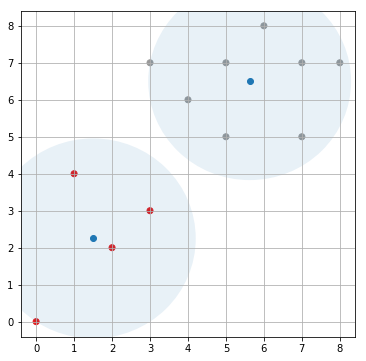

In [57]:
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

fig,ax = plt.subplots(figsize=(6,6))

plt.scatter(df['x0'],df['x1'], c=y_kmeans, cmap='Set1')
plt.scatter(c[:,0],c[:,1],)

circle1= plt.Circle(c1_centroid, c1_distances.max(), alpha=0.1)
circle2= plt.Circle(c2_centroid, c2_distances.max(), alpha=0.1)

ax.add_artist(circle1)
ax.add_artist(circle2)
plt.grid()

- **Elbow Method- to determine optimum clusters**

Text(0,0.5,'SSE or Inertia')

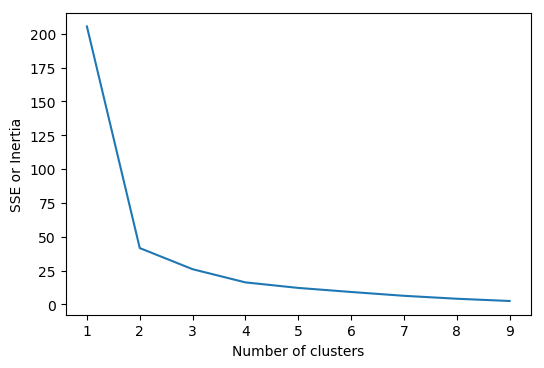

In [62]:

sse={}
for k in range(1,10):
    kmeans =KMeans(init='k-means++', n_clusters=k,max_iter=1000).fit(df)
    df["clusters"]=kmeans.labels_
    #print(df["clusters"])
    
    sse[k]= kmeans.inertia_
    
plt.figure(dpi= 100)
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE or Inertia")

- **Silhouette coefficient**

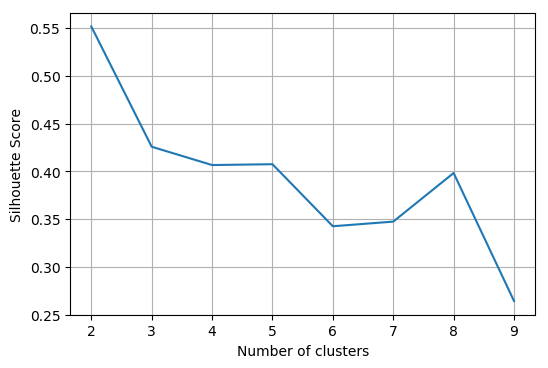

In [69]:
from sklearn.metrics import silhouette_score
sil={}
for k in range(2,10):
    kmeans =KMeans(init='k-means++', n_clusters=k,max_iter=1000).fit(df)
    df["clusters"]=kmeans.labels_
    
    label= kmeans.labels_
    sil_coeff=silhouette_score(df,label,metric='euclidean')
    sil[k]= sil_coeff
    
plt.figure(dpi= 100)
plt.plot(list(sil.keys()),list(sil.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid()